In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ANN_classes

In [2]:
csvdata = []
with open('data_m.csv', 'rb') as gtu_file:
    reader = csv.reader(gtu_file)
    for row in reader: 
        csvdata.append(row)
data_m = np.array(csvdata, str)

In [3]:
data_Nfp = np.add(
            np.multiply(
                data_m[:, 13].astype(float),
                data_m[:, 14].astype(float)),
            data_m[:, 28].astype(float))

In [4]:
Qvpg = 8251*4.1868  # кДж/м3
rhopg = 0.7078  # кг/м3
Qmpg = Qvpg / rhopg # кДж/кг

In [5]:
Qmptr = []
Qvptr = []
Etam = np.array([])

for i in np.arange(len(data_m)):
    # массовый расход
    Qmptr.append(Qmpg*float(data_m[i, 36])/3600)  # кДж*с
    try:
        Etam = np.append(Etam, float(data_Nfp[i])/(Qmptr[i]*1000))  # %
    except ZeroDivisionError:
        Etam = np.append(Etam, 0)

In [6]:
N_ladder = [np.arange(*i) for i in [(118, 174), (184,304), (310,372), (374,476), (486,574), (586,648),
                                    (676,760), (770,844), (852,1058), (1130,1402), (1412,1486), (1498,1594),
                                    (1700,1734),  # Вот здесь будем приклеивать ещё один кусочек
                                    (1820,1892), (1896,1950), (2042,2132)]]
N_ladder[12] = np.append(N_ladder[12], np.arange(1798,1818))  # Доклеиваем кусочек

# Выборки по мощности и остальным параметрам (необработанные)
data_Nfp_seq = [data_Nfp[i] for i in N_ladder]
data_Etam = [Etam[i] for i in N_ladder]
# data_TET = [data_m[i, 3].astype(float) for i in N_ladder]
# data_Tug = [data_criomean[i] for i in N_ladder]
# data_nob = [data_m[i, 1].astype(float) for i in N_ladder]
# data_G1t = [data_m[i, 36].astype(float) for i in N_ladder]
# data_Ptp = [data_m[i, 11].astype(float) for i in N_ladder]
# data_Nsn_ld = [data_Nsn[i] for i in N_ladder]

In [7]:
import custom_classes
reload(custom_classes)
sWorker = custom_classes.StatWorker()

In [8]:
data_Etam_mask = [sWorker.clean3sigma(i) for i in data_Etam]
data_Etam_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_Etam_mask)]
sWorker.set_alpha(0.05)
data_Nfp_Etam_seq_masked_means = [i[0][i[1]][i[2]].mean() 
                             for i in zip(data_Nfp_seq, data_Etam_mask, data_Etam_Nfp_mask)]
data_Etam_masked_means = [i[0][i[1]][i[2]].mean() 
                          for i in zip(data_Etam, data_Etam_mask, data_Etam_Nfp_mask)]
data_Etam_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Etam, data_Etam_mask, data_Etam_Nfp_mask)]
data_Nfp_Etam_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_Etam_mask, data_Etam_Nfp_mask)]

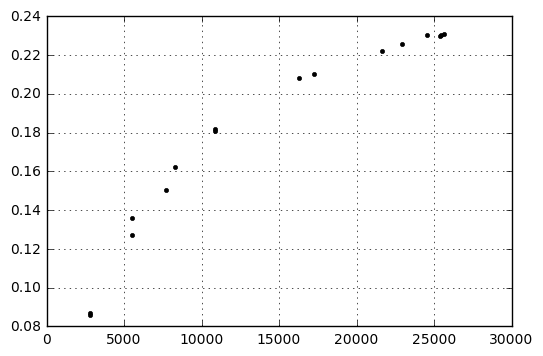

In [9]:
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(data_Nfp_Etam_seq_masked_means, data_Etam_masked_means, 'k.')
ax1.grid(True)
plt.show()

In [593]:
reload(ANN_classes)

<module 'ANN_classes' from 'ANN_classes.py'>

In [505]:
N1 = ANN_classes.Neuron(2)
N1.deltaT = 2.9999

In [557]:
N1_out = N1.forward([0.5, 1])
N1.getgrad([60], appr='target')
N1_wgrad = N1.backward()
print N1_out
print N1.Voo.g

2.75
[ 1.]


In [653]:
ANN1 = ANN_classes.NNetwork(2, 5, 2)
ANN1.cfg_input(2)

In [615]:
ANN1.VLoo[0].v

array([ 15.,  15.])

In [654]:
ANN1.unpackval(ANN1.VLii)

[array([ 1.,  1.]),
 array([ 1.,  1.]),
 array([ 1.,  1.]),
 array([ 1.,  1.]),
 array([ 1.,  1.])]

In [614]:
ANN1.forward([0.5, 1])

In [655]:
ANN1.VL1[0].g

array([ 1.,  1.,  1.,  1.,  1.])

In [656]:
ANN1.unpackgrad(ANN1.VL1)[0]

array([ 1.,  1.,  1.,  1.,  1.])

In [636]:
ANN1.getnetgrad([np.random.rand()*10+20, np.random.rand()*10+20])

In [632]:
ANN1.getnetgrad([0,0])

In [637]:
ANN1.backward()

ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [510]:
for _ in xrange(iterlim):
    ANN1.forward([0.5, 1])
    ANN1.getnetgrad([np.random.rand()*10+20, np.random.rand()*10+50])
    ANN1.backward()
ANN1.VLoo.v

TypeError: unsupported operand type(s) for +: 'int' and 'list'